In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


# LOADING AND UNDERSTANDING THE DATA

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/sf-salaries")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sf-salaries


In [3]:
df=pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv',low_memory=False)

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
df.shape

(148654, 13)

In [6]:
print('The no of rows in the dataset are:',df.shape[0])
print('The no of columns in the dataset are:',df.shape[1])


The no of rows in the dataset are: 148654
The no of columns in the dataset are: 13


In [7]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [8]:
df['Agency'].value_counts()

Agency
San Francisco    148654
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [10]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

## DATA CLEANING

### 1) Handling Null Values

In [11]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [12]:
df.drop(['Notes','Status','Id'],axis=1,inplace=True)

In [13]:
del df['Agency']

In [14]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [15]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [16]:
df['Benefits'].value_counts()

Benefits
0.0         1024
0.00         710
7959.18      348
4659.36      107
25699.2       83
            ... 
678.89         1
1074.63        1
659.11         1
750.67         1
29970.85       1
Name: count, Length: 98647, dtype: int64

In [17]:
df['Benefits']=df['Benefits'].fillna(0.0)

In [18]:
df.isnull().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [19]:
df['EmployeeName']=df['EmployeeName'].replace('Not provided',np.nan)
df['EmployeeName']

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650                  NaN
148651                  NaN
148652                  NaN
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

In [20]:
df.isnull().sum()
df.dropna(inplace=True)

In [21]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

In [22]:
df['OtherPay'].value_counts()

OtherPay
0.0         29777
0.00        11532
624.0        1340
624.00        752
648.0         739
            ...  
11751.72        1
1547.88         1
10987.4         1
6770.4          1
-618.13         1
Name: count, Length: 83975, dtype: int64

In [23]:
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')

In [24]:
df['OvertimePay']= pd.to_numeric(df['OvertimePay'], errors='coerce')

In [25]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [26]:
x=df['BasePay'].mean()

df['BasePay']=df['BasePay'].fillna(x)

In [27]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [28]:
df.describe()

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000
mean,66325.448840,5086.740800,3645.661408,75057.851048,94038.185067,2012.520653
std,42764.635495,11473.181557,8019.498636,50409.761170,62683.477905,1.119390
min,-166.010000,-0.010000,-7058.590000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,36958.160000,45077.410000,2012.000000
50%,65007.450000,0.000000,817.170000,71644.710000,92675.510000,2013.000000
75%,94691.050000,4695.710000,4242.900000,106028.000000,133085.410000,2014.000000
max,319275.010000,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


**2. DEALING WITH DUPLICATE VALUES**

In [29]:
df.duplicated().sum()

0

In [30]:
df=df.drop_duplicates()

In [31]:
df.shape

(148045, 9)

### UNIVARIATE ANALYSIS

In [32]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [33]:
## JOB TITLE COLUMN
df['JobTitle'] = df['JobTitle'].str.title()

In [34]:
## MOST COMMON JOBS
df['JobTitle'].value_counts().head(5)

JobTitle
Transit Operator    9363
Special Nurse       5784
Registered Nurse    4944
Custodian           3205
Firefighter         3142
Name: count, dtype: int64

**In the dataset Transit Operator job profile is most common.**

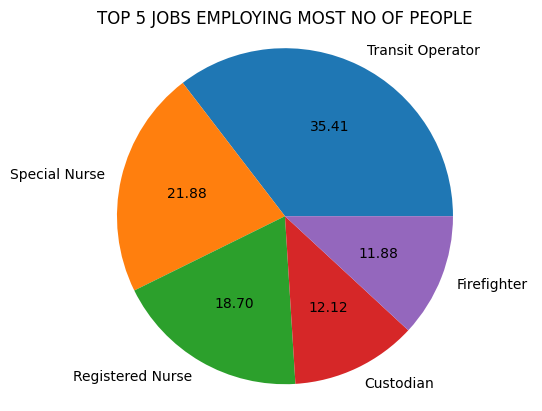

In [35]:
df['JobTitle'].value_counts().head(5).plot(kind='pie',autopct='%.2f')
plt.title('TOP 5 JOBS EMPLOYING MOST NO OF PEOPLE')
plt.ylabel('')
plt.axis('equal')  # Keeps pie chart circular
plt.axis('off') 
plt.show()


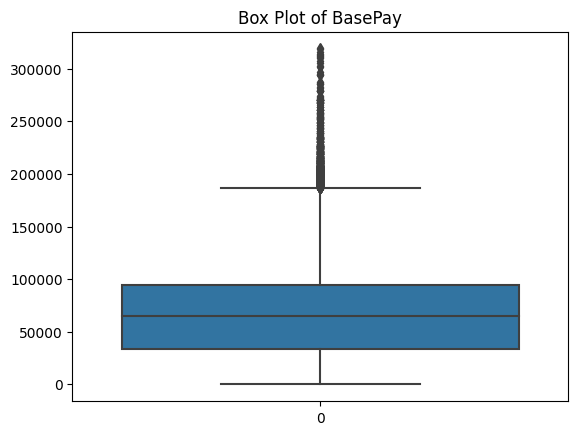

In [36]:
## BASE PAY COLUMN
df['BasePay'].describe()
sns.boxplot(df['BasePay'])
plt.title('Box Plot of BasePay')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


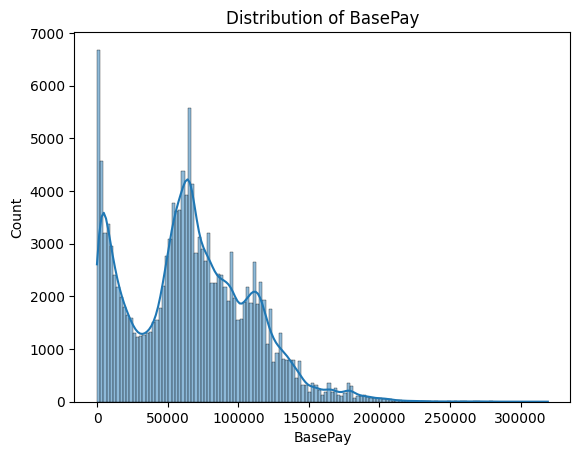

In [37]:
sns.histplot(df['BasePay'], kde=True)
plt.title('Distribution of BasePay')
plt.show()

In [38]:
##  JOB PROFILES WITH THE HIGHEST BASEPAY (TOP 5)
df_2=df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(5)
df_2

JobTitle
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
Chief Of Police                           296443.365000
Chief Of Department, (Fire Department)    285262.000000
Dep Dir For Investments, Ret              276153.765000
Name: BasePay, dtype: float64

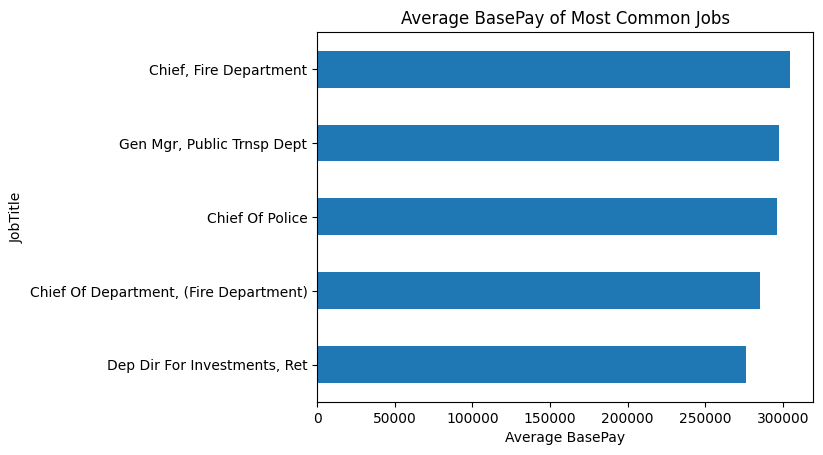

In [39]:
df_2.plot(kind='barh')
plt.xlabel('Average BasePay')
plt.title('Average BasePay of Most Common Jobs')
plt.gca().invert_yaxis()
plt.show()

In [40]:
## NAME OF PERSON HAVING THE HIGHEST BASEPAY
df[df['BasePay'].max()==df['BasePay']]['EmployeeName']


72925    Gregory P Suhr
Name: EmployeeName, dtype: object

In [41]:
## TOTAL BASEPAY DISTRIBUTION ACCORDING TO JOB PROFILE
df.groupby('JobTitle')['BasePay'].sum().sort_values(ascending=False).head(15)

JobTitle
Registered Nurse             4.981047e+08
Transit Operator             4.773616e+08
Firefighter                  3.189530e+08
Police Officer 3             2.616144e+08
Deputy Sheriff               2.213844e+08
Attorney (Civil/Criminal)    2.000622e+08
Special Nurse                1.708151e+08
Sergeant 3                   1.369062e+08
Custodian                    1.340734e+08
Police Officer 2             1.270194e+08
Police Officer               1.221337e+08
Emt/Paramedic/Firefighter    9.303011e+07
Police Officer Iii           8.282690e+07
Nurse Practitioner           7.923949e+07
Patient Care Assistant       7.685700e+07
Name: BasePay, dtype: float64

In [42]:
## WHAT IS THE AVERAGE BASEPAY OF THE MOST COMMON JOBS?

top_jobs = df['JobTitle'].value_counts().head(5)
df_top_jobs = df[df['JobTitle'].isin(top_jobs.index)]
avg_basepay_top_jobs = df_top_jobs.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False)
print(avg_basepay_top_jobs)

JobTitle
Firefighter         101512.730544
Registered Nurse    100749.334041
Transit Operator     50983.833547
Custodian            41832.585984
Special Nurse        29532.342993
Name: BasePay, dtype: float64


**Among the most common jobs FireFighter profile has the highest BasePay**

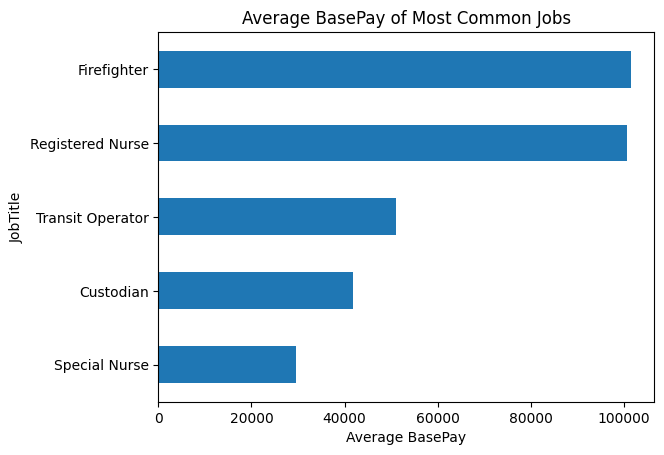

In [43]:
avg_basepay_top_jobs.plot(kind='barh')
plt.xlabel('Average BasePay')
plt.title('Average BasePay of Most Common Jobs')
plt.gca().invert_yaxis()
plt.show()

In [44]:
## AVERAGE BASEPAY OF SAN FRANCISCO
print('The average BasePay of San Francisco is:',round(df['BasePay'].mean(),2))

The average BasePay of San Franciso is: 66325.45


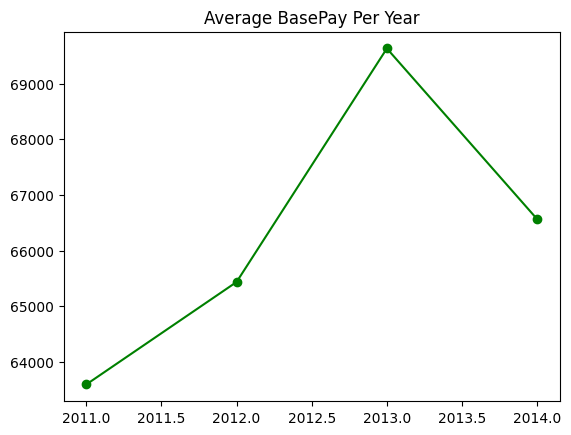

In [45]:
## AVERAGE BASEPAY PER YEAR
df_1=df.groupby('Year')['BasePay'].mean().reset_index()
plt.plot(df_1['Year'],df_1['BasePay'],marker='o',color='green')
plt.title('Average BasePay Per Year')
plt.show()

**The average Basepay was maximum in the year 2013 and has been showing a sharp upward trend from 2011-13. However in the year 2014 it showed a gradual decline.**

In [46]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [47]:
df['OvertimePay'].dtype

dtype('float64')

In [48]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')


In [49]:
## OVERTIMEPAY 
print(len(df[df['OvertimePay']==0.00]))
print(len(df[df['OvertimePay']!=0.00]))
df_o=df[df['OvertimePay']!=0.00]
df_o


76720
71325


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
1,GARY JIMENEZ,Captain Iii (Police Department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,Captain Iii (Police Department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,Wire Rope Cable Maintenance Mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"Deputy Chief Of Department,(Fire Department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
5,DAVID SULLIVAN,Assistant Deputy Chief Ii,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011
...,...,...,...,...,...,...,...,...,...
148285,Greg K Hansen,Junior Clerk,156.50,249.42,0.00,4.06,405.92,409.98,2014
148300,Julien N Heng,Junior Clerk,152.00,228.00,0.00,3.80,380.00,383.80,2014
148386,Michael Brito,Junior Clerk,156.50,102.70,0.00,2.59,259.20,261.79,2014
148398,Shane O'Connor,Transit Operator,151.38,56.77,0.00,42.84,208.15,250.99,2014


In [50]:
## AVERAGE OVERTIME PAY INCLUDING ENTRIES WHERE IT IS NOT NULL
print('The Average OverTimePay excluding the null entries is:',round(df_o['OvertimePay'].mean(),2))

## AVERAGE OVERTIME PAY INCLUDING ENTRIES WHERE IT IS NULL
print('The Average OverTimePay including the null entries is:',round(df['OvertimePay'].mean(),2))

The Average OverTimePay excluding the null entries is: 10558.24
The Average OverTimePay including the null entries is: 5086.74


In [51]:
## WHICH JOBS OFFER THE HIGHEST OVERTIME PAY?
df.groupby('JobTitle')['OvertimePay'].mean().sort_values(ascending=False).head(10)

JobTitle
Wire Rope Cable Maint Sprv                82446.923333
Wire Rope Cable Maintenance Supervisor    66164.730000
Trnst Power Line Wrk Sprv 2               59259.306667
Incident Support Specialist               51096.252692
Battalion Chief, Fire Suppress            51022.989524
Track Maint Wrk Sprv 1                    50613.903478
Mech Shop & Equip Supt                    47362.470000
Transit Power Line Sprv1                  46455.926842
Asst Chf Of Dept (Fire Dept)              46024.222222
Heating/Ventilating Inspector             45997.238333
Name: OvertimePay, dtype: float64

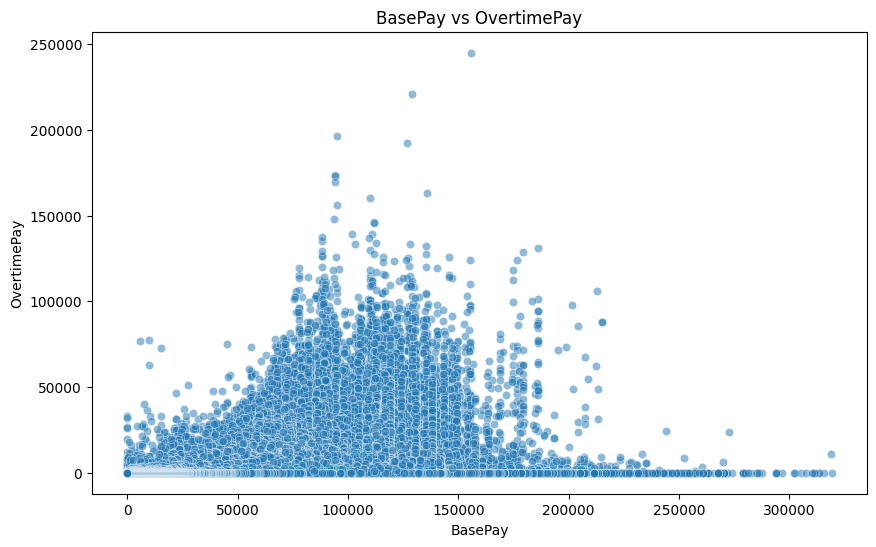

In [52]:
## OVERTIMEPAY VS BASEPAY
plt.figure(figsize=(10,6))
sns.scatterplot(x='BasePay', y='OvertimePay', data=df, alpha=0.5)
plt.title('BasePay vs OvertimePay')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()



In [53]:
correlation = df['BasePay'].corr(df['OvertimePay'])
print(f"Correlation: {correlation:.2f}")



Correlation: 0.27


There isn't a strong corelation between BasePay and OvertimePay but the coefficient is positive indicating that employees having higher basepay have higher overtime pay as well.

In [54]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


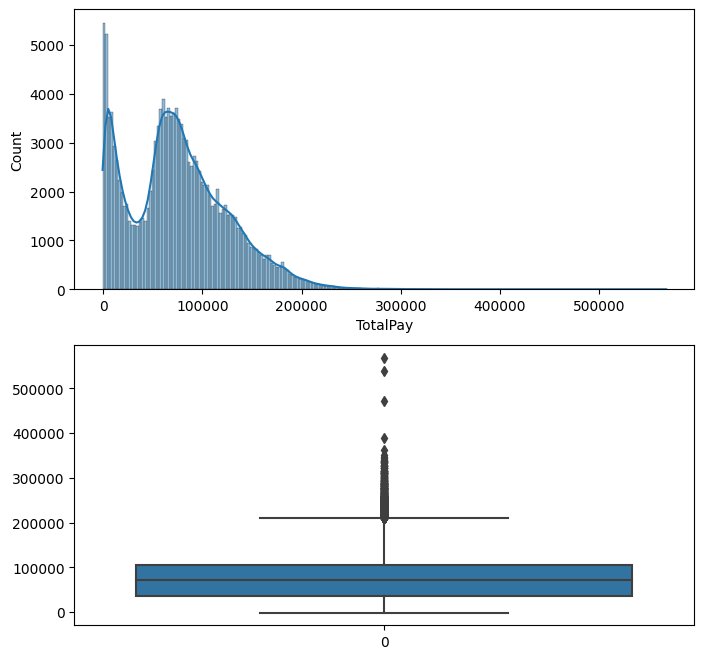

In [70]:
## TOTALPAY AND TOTALPAYBENEFITS
df['TotalPay'].describe()

## TOTALPAY DISTRIBUTION AND BOXPLOT
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.histplot(df['TotalPay'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(df['TotalPay'])
plt.show()

In [56]:
##  WHO ARE THE TOP 10 EARNERS?
df.sort_values(by='TotalPayBenefits', ascending=False)[['EmployeeName', 'JobTitle', 'TotalPayBenefits']].head(10)


,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,General Manager-Metropolitan Transit Authority,567595.43
1,GARY JIMENEZ,Captain Iii (Police Department),538909.28
110531,David Shinn,Deputy Chief 3,510732.68
110532,Amy P Hart,Asst Med Examiner,479652.21
110533,William J Coaker Jr.,Chief Investment Officer,436224.36
72925,Gregory P Suhr,Chief Of Police,425815.28
72926,Joanne M Hayes-White,"Chief, Fire Department",422353.40
110534,Gregory P Suhr,Chief Of Police,418019.22
110535,Joanne M Hayes-White,"Chief, Fire Department",417435.10
110536,Ellen G Moffatt,Asst Med Examiner,415767.94


In [57]:
## WHO ARE THE BOTTOM 10 EARNERS?
df_1=df[df['TotalPayBenefits']!=0.00]      
df_1.sort_values(by='TotalPayBenefits', ascending=False)[['EmployeeName', 'JobTitle', 'TotalPayBenefits']].tail(10)


,EmployeeName,JobTitle,TotalPayBenefits
148624,Lorraine Rosenthal,Senior Clerk,12.89
36152,MARCELLA TUCKER,Transit Operator,8.86
148625,Renato C Gurion,Registered Nurse,7.24
36153,ROCK CRAWFORD,Firefighter,5.80
72922,John Draper,Clerk,5.17
36154,SERENA HUGHES,Swimming Instructor/Pool Lifeguard,4.17
72923,Cherise Wong,Special Nurse,4.16
72924,Donald Clark,Transit Operator,1.91
36155,JOE BROWN JR,Transit Operator,0.30
148653,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13


The close examination of job profiles of people having lowest earnings reveals that they don't have fixed source of income and are working in unorganized sector.

In [58]:
## HOW JOBS HAVE EVOVLED OVER THE YEARS ?
df.groupby(['Year', 'JobTitle']).size()



Year  JobTitle                      
2011  Account Clerk                     83
      Accountant                         5
      Accountant Intern                 48
      Acupuncturist                      1
      Administrative Analyst            93
                                        ..
2014  Wire Rope Cable Maint Sprv         1
      Worker'S Comp Supervisor 1         6
      Worker'S Compensation Adjuster    26
      X-Ray Laboratory Aide             35
      Youth Comm Advisor                 1
Length: 4126, dtype: int64

In [59]:
## TOP 5 MOST COMMON JOBS BY YEAR
## METHOD 1
top_n = 5  

df['JobTitle'] = df['JobTitle'].str.title() 
result = (
    df.groupby(['Year', 'JobTitle'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Year', 'Count'], ascending=[True, False])
    .groupby('Year')
    .head(top_n)
)
print(result)


      Year                      JobTitle  Count
983   2011              Transit Operator   2388
909   2011                 Special Nurse   1402
750   2011              Registered Nurse   1219
268   2011                     Custodian    796
381   2011                   Firefighter    794
2036  2012              Transit Operator   2262
1930  2012                 Special Nurse   1466
1801  2012              Registered Nurse   1271
1727  2012              Police Officer 3    864
1315  2012                     Custodian    825
3075  2013              Transit Operator   2234
2969  2013                 Special Nurse   1438
2847  2013              Registered Nurse   1220
2837  2013  Public Svc Aide-Public Works    855
2361  2013                     Custodian    780
4068  2014              Transit Operator   2479
3972  2014                 Special Nurse   1478
3853  2014              Registered Nurse   1234
3842  2014  Public Svc Aide-Public Works    916
3495  2014                   Firefighter

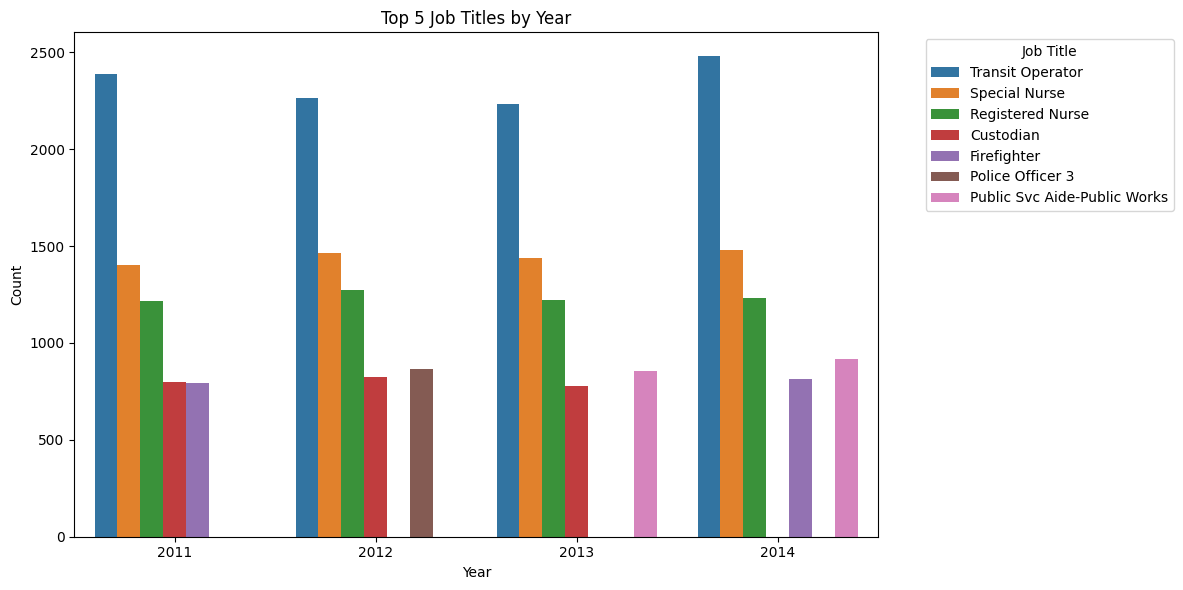

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Year', y='Count', hue='JobTitle')
plt.title(f"Top {top_n} Job Titles by Year")
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
## METHOD 2
top_jobs_by_year = {}

for year in sorted(df['Year'].unique()):
    job_counts = df[df['Year'] == year]['JobTitle'].value_counts().head(top_n)
    top_jobs_by_year[year] = job_counts


print(top_jobs_by_year[2013])


JobTitle
Transit Operator                2234
Special Nurse                   1438
Registered Nurse                1220
Public Svc Aide-Public Works     855
Custodian                        780
Name: count, dtype: int64


There has not been change in the jobs over the years and the most common jobs are more or less the same 

/tmp/ipykernel_36/3270807529.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('BasePayBin')['OvertimePay'].mean()


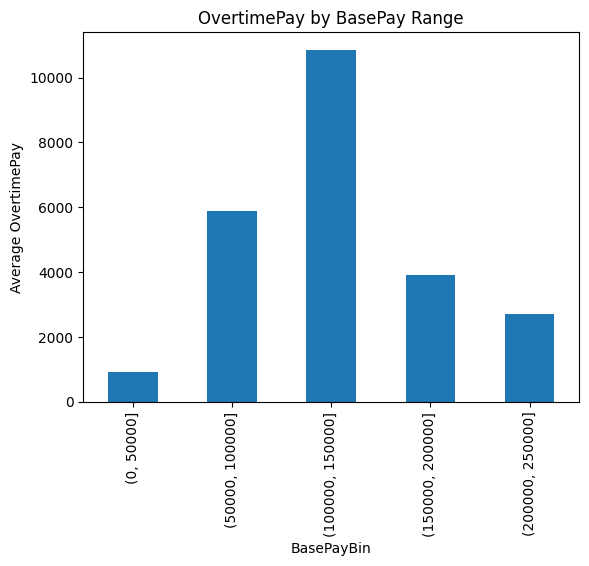

In [63]:
## OVERTIME PAY IN DIFFERENT BASEPAY RANGES
df['BasePayBin'] = pd.cut(df['BasePay'], bins=[0, 50000, 100000, 150000, 200000, 250000])
grouped = df.groupby('BasePayBin')['OvertimePay'].mean()

grouped.plot(kind='bar')
plt.ylabel('Average OvertimePay')
plt.title('OvertimePay by BasePay Range')
plt.show()


Overtime Pay is highest for people having salary in the range 100000-150000

In [65]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'BasePayBin'],
      dtype='object')

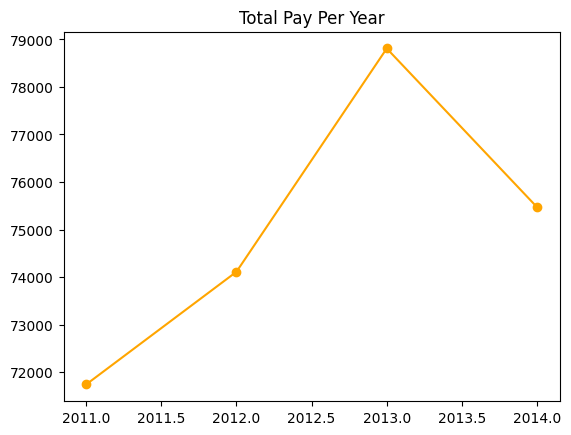

In [71]:
## TOTAL PAY VARIATION ACCORDING TO YEAR 
df_year=df.groupby('Year')['TotalPay'].mean().reset_index()
plt.plot(df_year['Year'],df_year['TotalPay'],marker='o',color='orange')
plt.title('Total Pay Per Year')
plt.show()

In [73]:
## WHICH JOBS HAVE SHOWN GOOD RISE IN SALARY?
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df = df.dropna(subset=['BasePay', 'JobTitle', 'Year'])

df['JobTitle'] = df['JobTitle'].str.title()

pivot = df.pivot_table(index='JobTitle', columns='Year', values='BasePay', aggfunc='mean')

pivot['Growth'] = pivot[2014] - pivot[2011]
pivot['%Growth'] = ((pivot[2014] - pivot[2011]) / pivot[2011]) * 100

pivot = pivot.dropna(subset=[2011, 2014])  # Drop rows where 2011 or 2014 data is missing
top_growing_jobs = pivot.sort_values(by='Growth', ascending=False).head(10)
print(top_growing_jobs[['Growth', '%Growth']])


Year                                  Growth     %Growth
JobTitle                                                
Mayor                          147331.460000  109.780322
District Attorney              131710.460000  112.518611
Chief Adult Probation Officer  112904.270000  119.159337
Assistant Sheriff               90143.775000   95.490877
Attorney, Tax Collector         71046.650000   82.244769
Mayoral Staff Xvii              67060.806000   65.132183
Mayoral Staff Xi                61490.277500  504.150904
Senior Real Property Officer    55385.975000   88.410912
Criminalist I                   54885.306667  247.435375
Fire Rescue Paramedic           51927.391429   77.104526


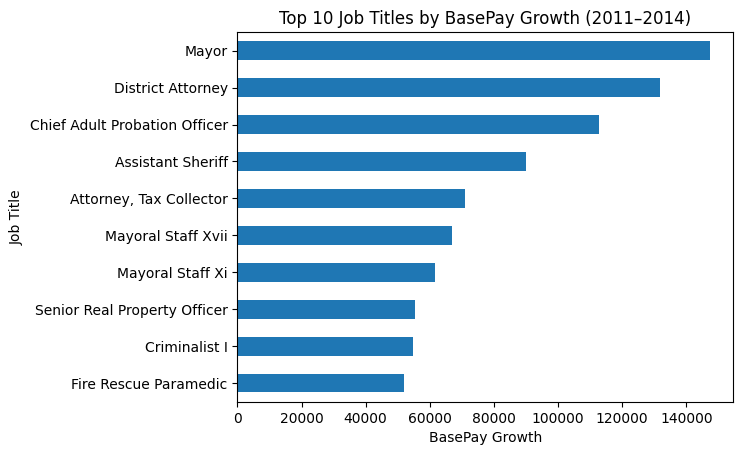

In [74]:
top_growing_jobs['Growth'].head(10).plot(kind='barh')
plt.title('Top 10 Job Titles by BasePay Growth (2011–2014)')
plt.xlabel('BasePay Growth')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()
plt.show()
